In [1]:
import os
import numpy as np
import pandas as pd

/tmp/ipykernel_40/2916776140.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
source_data_path = "ncu_report_full_q4_3layers_timeline.csv"

In [3]:
! head -n 2 ./ncu_report_full_q4_3layers_timeline.csv | awk '{for(i=1;i<=20;i++) printf "%s ", $i; print ""}'

﻿ID,Time,API Call ID,Estimated Speedup,"Runtime Improvement""""(0)","Issues Detected""""(30471)",Function Name,Mangled Name,Demangled Name,Process,Thread ID,Device Name,CUprogram,CUfunction,Grid Offset,Grid Size,Block Size,Grid Dimensions,gpc__cycles_elapsed.max [cycle],gpu__time_duration.sum [usecond],sm__throughput.avg.pct_of_peak_sustained_elapsed [%],gpu__compute_memory_throughput.avg.pct_of_peak_sustained_elapsed [%],breakdown:gpu__compute_memory_throughput.avg.pct_of_peak_sustained_elapsed,breakdown:sm__throughput.avg.pct_of_peak_sustained_elapsed,c2clink__enabled_mask,c2clink__present,device__attribute_architecture,device__attribute_async_engine_count,device__attribute_can_flush_remote_writes,device__attribute_can_map_host_memory,device__attribute_can_tex2d_gather,device__attribute_can_use_64_bit_stream_mem_ops,device__attribute_can_use_64_bit_stream_mem_ops_v1,device__attribute_can_use_host_pointer_for_registered_mem,device__attribute_can_use_stream_mem_ops_v1,device__attribute

In [4]:
source_data = pd.read_csv(source_data_path, thousands=',')

In [5]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Columns: 3659 entries, ID to smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_second [inst/second]
dtypes: float64(2063), int64(1576), object(20)
memory usage: 301.1+ MB


In [6]:
kw = [
    # "Throughput",
    "Tensor",
    "inst_executed",
    "integer_",
    "int8",
    "int4",
    "fp16",
    "fp32",
    "fp64",

    
    
]

metadata = [
    # Metadata
    "ID",
    "Time",
    "Function Name",
    "Demangled Name",
]

skip = [
    "fbpa",
    "dram",
    "device__attribute",
    "regex:",
    
]
def in_kw(col):
    for m in metadata:
        if m.lower() == col.lower():
            return True
    for s in skip:
        if s.lower() in col.lower():
            return False
    for k in kw:
        if k.lower() in col.lower():
            return True
            
    return False

In [7]:
filter_data = source_data.loc[:,[c for c in source_data.columns if in_kw(c)]]

In [8]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Columns: 3368 entries, ID to smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_second [inst/second]
dtypes: float64(2008), int64(1357), object(3)
memory usage: 277.2+ MB


In [9]:
filter_data

,ID,Time,Function Name,Demangled Name,sm__inst_executed.avg.pct_of_peak_sustained_elapsed [%],sm__inst_executed_pipe_adu.avg.pct_of_peak_sustained_elapsed [%],sm__inst_executed_pipe_cbu_pred_on_any.avg.pct_of_peak_sustained_elapsed [%],sm__inst_executed_pipe_fp16.avg [inst],sm__inst_executed_pipe_fp16.avg.pct_of_peak_sustained_active [%],sm__inst_executed_pipe_fp16.avg.pct_of_peak_sustained_elapsed [%],...,smsp__thread_inst_executed_pipe_fp64_pred_on.sum.peak_sustained_elapsed.per_second [inst/nsecond],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.peak_sustained_frame [inst],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.peak_sustained_frame.per_second [inst/nsecond],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.peak_sustained_region [inst],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.peak_sustained_region.per_second [inst/nsecond],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_cycle_active [inst/cycle],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_cycle_elapsed [inst/cycle],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_cycle_in_frame [inst/cycle],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_cycle_in_region [inst/cycle],smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_second [inst/second]
0,0,2024-Feb-16 08:19:00,k_bin_bcast,"void k_bin_bcast<&op_mul, float, float, float>...",3.70,0.48,0.08,0.0,0.00,0.00,...,391.64,1278304,391.64,1278304,391.64,0,0,0,0,0
1,1,2024-Feb-16 08:19:01,k_bin_bcast,"void k_bin_bcast<&op_add, float, float, float>...",3.82,0.50,0.08,0.0,0.00,0.00,...,358.82,1240096,358.82,1240096,358.82,0,0,0,0,0
2,2,2024-Feb-16 08:19:01,k_bin_bcast,"void k_bin_bcast<&op_add, float, float, float>...",3.78,0.49,0.08,0.0,0.00,0.00,...,380.18,1253072,380.18,1253072,380.18,0,0,0,0,0
3,3,2024-Feb-16 08:19:01,rms_norm_f32,"void rms_norm_f32<(int)1024>(const float *, fl...",0.93,0.12,0.65,0.0,0.00,0.00,...,415.92,1743520,415.92,1743520,415.92,0,0,0,0,0
4,4,2024-Feb-16 08:19:02,k_bin_bcast,"void k_bin_bcast<&op_mul, float, float, float>...",3.69,0.48,0.08,0.0,0.00,0.00,...,313.74,1285088,313.74,1285088,313.74,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,10782,2024-Feb-16 09:22:09,mul_mat_vec_q,"void mul_mat_vec_q<(int)32, (int)4, block_q4_0...",17.63,0.13,0.54,8601.6,3.01,2.83,...,500.09,48552656,500.09,48552656,500.09,0,0,0,0,0
10783,10783,2024-Feb-16 09:22:09,k_bin_bcast,"void k_bin_bcast<&op_mul, float, float, float>...",1.95,0.25,0.04,0.0,0.00,0.00,...,500.18,1216432,500.18,1216432,500.18,0,0,0,0,0
10784,10784,2024-Feb-16 09:22:10,k_bin_bcast,"void k_bin_bcast<&op_add, float, float, float>...",1.86,0.24,0.04,0.0,0.00,0.00,...,509.26,1271120,509.26,1271120,509.26,0,0,0,0,0
10785,10785,2024-Feb-16 09:22:10,k_bin_bcast,"void k_bin_bcast<&op_add, float, float, float>...",1.91,0.25,0.04,0.0,0.00,0.00,...,379.43,1238464,379.43,1238464,379.43,0,0,0,0,0


In [10]:
# pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Columns: 3368 entries, ID to smsp__thread_inst_executed_pipe_fp64_pred_on.sum.per_second [inst/second]
dtypes: float64(2008), int64(1357), object(3)
memory usage: 277.2+ MB


In [12]:
fig1 = filter_data.iloc[:, [4]]

<Axes: >

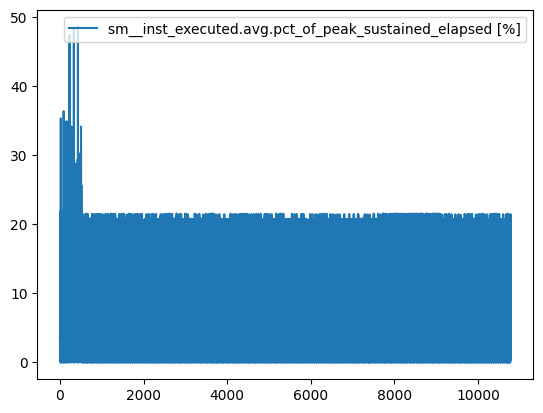

In [13]:
fig1.plot()

In [14]:
with open("metrics.txt", "w") as f:
    for i, col in enumerate(filter_data.columns):
        f.write(str(i)+"\t")
        f.write(col)
        f.write("\n")
    

In [25]:
with open("all_metrics.txt", "w") as f:
    for i, col in enumerate(source_data.columns):
        f.write(str(i)+"\t")
        f.write(col)
        f.write("\n")
    

<Axes: >

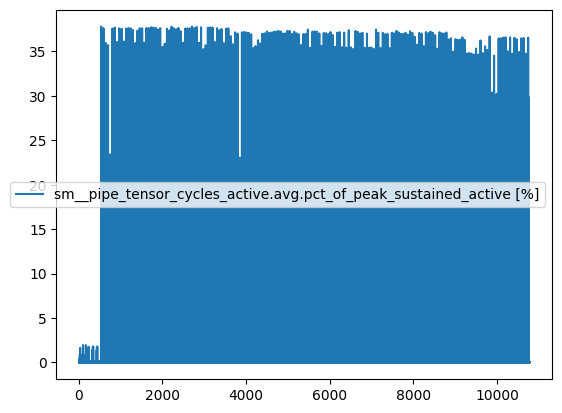

In [15]:
filter_data.iloc[:, [1001]].plot() # tensor_precision_fu_utilization

<Axes: >

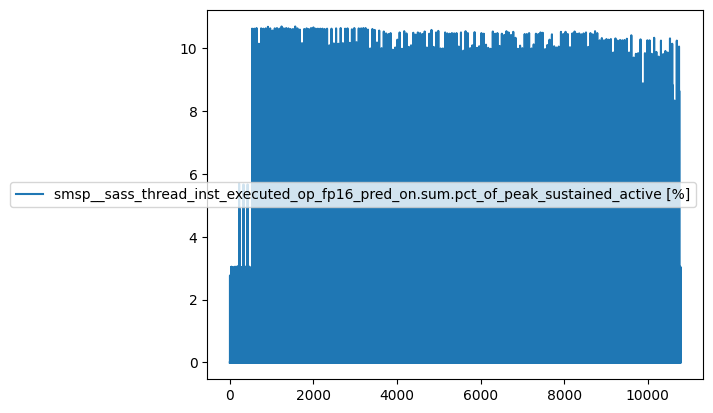

In [16]:
filter_data.iloc[:, [2970]].plot() # smsp__sass_thread_inst_executed_op_fp16_pred_on.sum.pct_of_peak_sustained_active [%]

<Axes: >

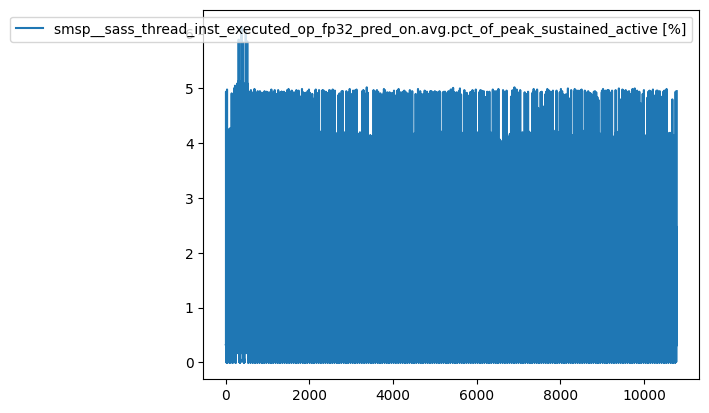

In [17]:
filter_data.iloc[:, [2989]].plot() 

<Axes: >

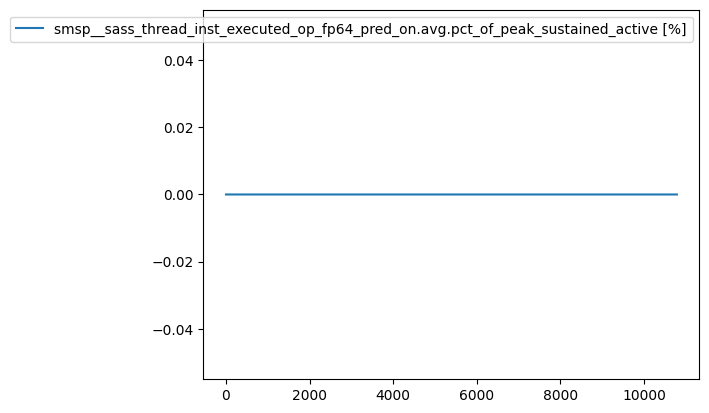

In [18]:
filter_data.iloc[:, [3065]].plot() 

<Axes: >

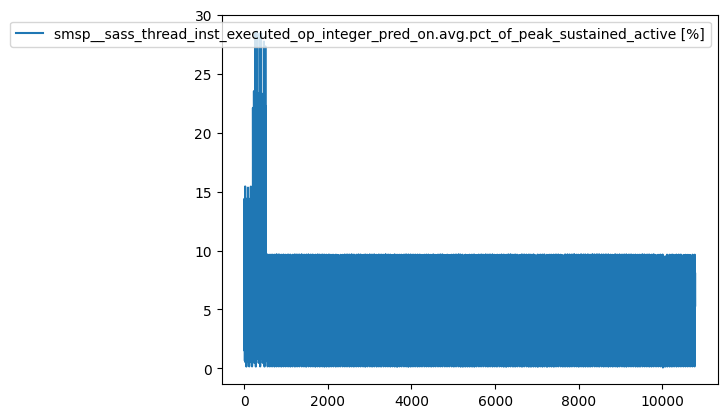

In [19]:
filter_data.iloc[:, [3141]].plot() 

<Axes: >

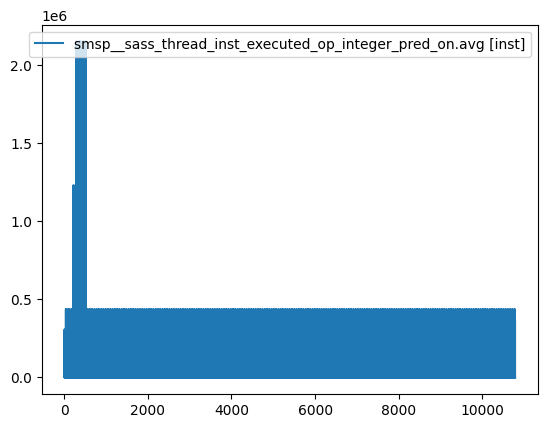

In [20]:
filter_data.iloc[:, [3140]].plot() 

<Axes: >

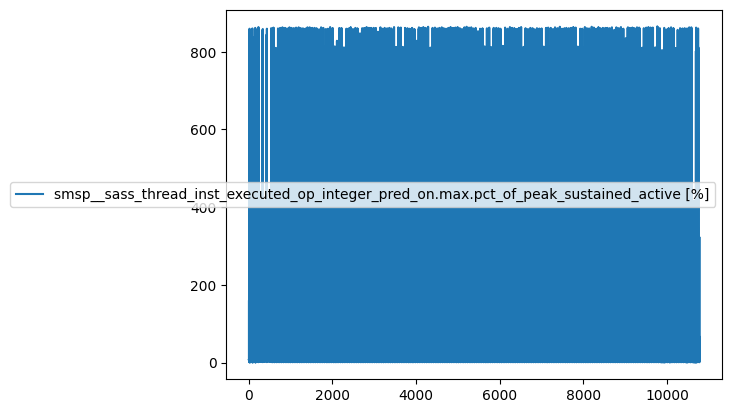

In [21]:
filter_data.iloc[:, [3160]].plot() 

<Axes: >

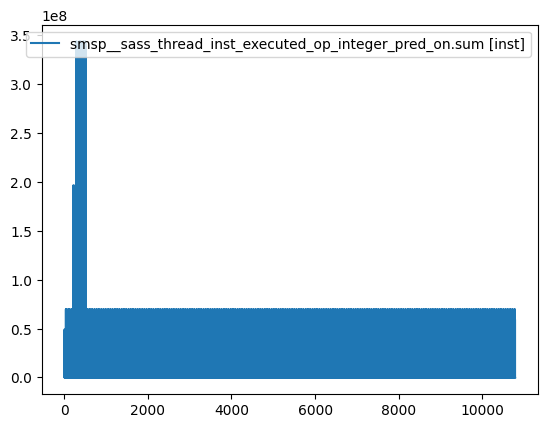

In [22]:
filter_data.iloc[:, [3197]].plot() 

<Axes: >

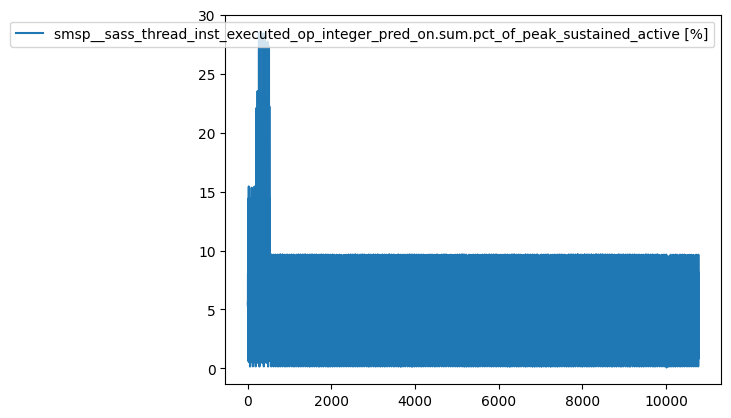

In [23]:
filter_data.iloc[:, [3198]].plot() 

In [24]:
# Utilization of different components (Memory + Compute)

<Axes: >

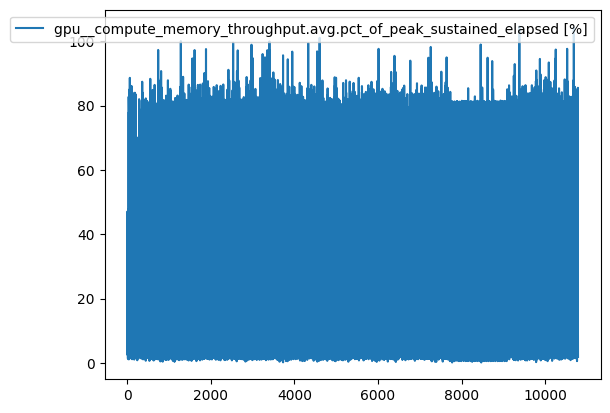

In [26]:
source_data.iloc[:, [21]].plot() 

In [29]:
max(filter_data["ID"]) # MAX ID

10786